# Basic statistics with `R`

# 1 Random variable

- $X \sim \mathcal{N}(\mu, \sigma^2)$: The random variable $X$ follows a normal distribution or a Gaussian distribution with mean $\mu$ and variance $\sigma^2$ (or standard deviation $\sigma$).

- Let $X_1,X_2,\ldots, X_n$ be independent and identically distributed (*i.i.d.*) random variables (*r.v.*s) from $\mathcal{N}(0,1)$ --- also known as the standard normal distribution. Q: why is $\mathcal{N}(0,1)$ special?

- Sometimes we may use $\{X_i\}_{i=1}^n$ as a shorthand notation for $X_1,X_2,\ldots, X_n$ in this course.

- c.d.f.: cumulative distribution function, $F(x) \equiv {\rm Prob}(X \leq x)$. Subscripts may be employed to distinguish multiple distributions.

- p.d.f.: probability density function, $f(x)$ or $p(x) \equiv \frac{\rm d}{ {\rm d} x}F(x)$. Q: does a discrete random variable have a p.d.f.?

- Likelihood: $\mathcal{L}(\theta \mid x) = f_{\theta}(X=x)$, or the density/probability of observing $x$ when the true parameter(s) is $\theta$. 

- Quantiles: The $100 \alpha \%$ quantile is the cut point $q$ at which $F(q) = \alpha$. Q: what is a median?



In [ ]:
## Random seed
set.seed(1) # set random number generator seed for reproducibility

rnorm(1) # Draw one sample from standard normal distribution 


In [1]:
?rnorm # Read the help file!

In [ ]:
rnorm(n=1,mean=10,sd=2)

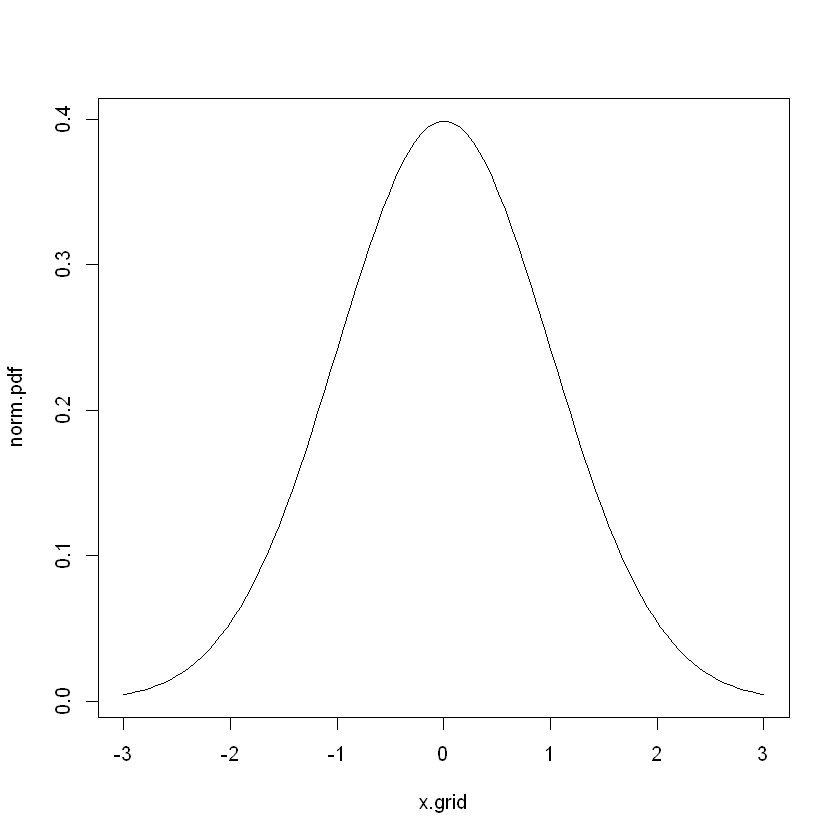

In [3]:
# To help understand the random variable, we can draw the density plot for this distribution

x.grid=seq(from=-3,to=3,length.out=100)
norm.pdf=dnorm(x.grid,mean=0,sd=1);
plot(y=norm.pdf,x=x.grid,type='l')


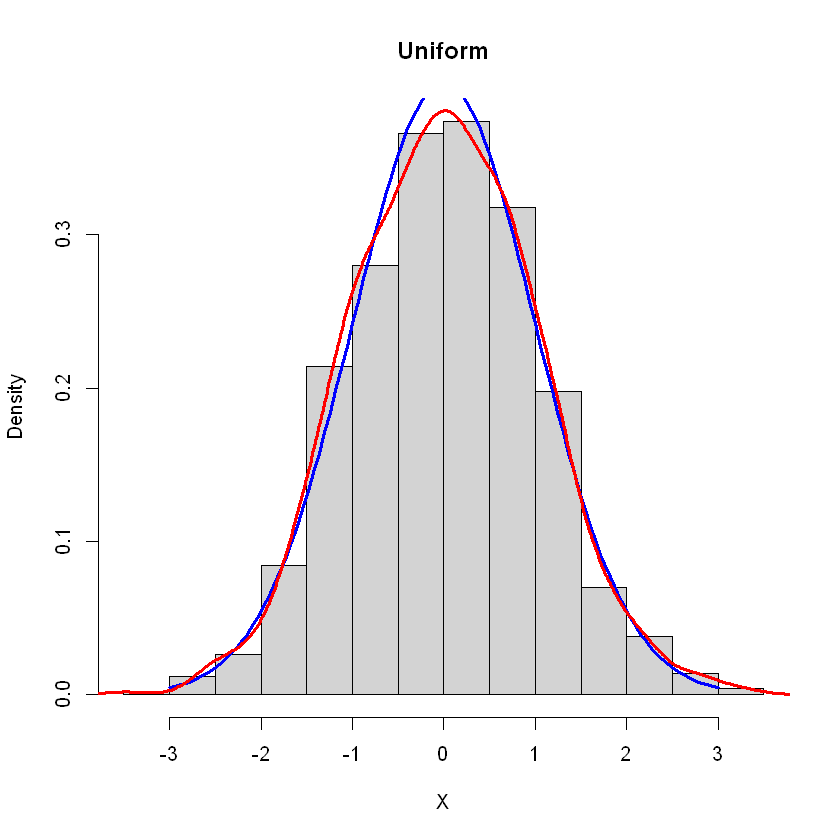

In [4]:
# Compare this with a histogram of 1000 i.i.d. samples from rnorm

rvs=rnorm(1000);
hist(rvs,freq=FALSE,main='Uniform',xlab='X')
lines(y=norm.pdf,x=x.grid,col='blue',lwd=3)
# Further compare it with a smooth density estimation based on the samples:
norm.pdf.est=density(rvs);
lines(norm.pdf.est,col='red',lwd=3)

# 2 Basic summary statistics

To list a few

- Sum $\sum_{i=1}^n X_i \equiv X_1 + X_2 + \cdots + X_n$.
- (Sample) Mean $\bar{X} \equiv  \frac{1}{n} \sum_{i=1}^n X_i$.
- (Sample) variance $\hat{\rm var}(X) \equiv \frac{1}{n} \sum_{i=1}^n (X_i-\bar{X})^2$ or $\frac{1}{n-1} \sum_{i=1}^n (X_i-\bar{X})^2$
- Q: what the the population mean and population variance for $X_1,X_2,\ldots, X_n$ that are i.i.d. $\mathcal{N}(\mu,\sigma^2)$?
- (Sample) Standard deviation: $\hat{\rm sd}(X) \equiv \{\hat{\rm var}(X) \}^{1/2}$
- Standard error of the sample mean: $\hat{\rm sd}(X)/\sqrt{n}$
- Sample size, sample quantiles, etc.

In [6]:
X = rnorm(10)

sum(X) # summation
mean(X) # sample mean
var(X) # sample variance
sd(X) # standard deviation 

[1] -1.579452

[1] -0.1579452

[1] 2.898528

[1] 1.702506

# 3 Hypothesis testing

Consider the following null and alternative hypotheses for $X_1, X_2, \ldots, X_n$ that are i.i.d. samples from $\mathcal{N}(\mu,1)$.

- $H_0: \mu=0$

- $H_a$ (or $H_1$): $\mu\neq 0$

- Significance level $\alpha$

- P-value

- Critical value 

- Type I error and type I error rate

- Type II error and type II error rate

- Power 

In [12]:
# 
X=rnorm(10)
t.test(X)


	One Sample t-test

data:  X
t = -0.47407, df = 9, p-value = 0.6467
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.9029530  0.5900656
sample estimates:
 mean of x 
-0.1564437 


In [11]:
Y=rnorm(10,mean=2)
t.test(Y)


	One Sample t-test

data:  Y
t = 8.6686, df = 9, p-value = 1.159e-05
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 1.481343 2.527490
sample estimates:
mean of x 
 2.004416 


In [19]:
## Write a simulation to verify the equivalence between type I error rate and significance level, under the null H0: mu=0 (slope is zero)
alpha=0.03; # significance level 
simulate.one.instance<-function(n,alpha){
  X=rnorm(n)
  pval=t.test(X)$p.value
  rej.flag= pval<alpha
  return(rej.flag)
}

N.sim=1e4;
set.seed(1)
n=50;
sim.typeI=replicate(N.sim,simulate.one.instance(n,alpha));
mean(sim.typeI)

[1] 0.0299

Q: what is the distribution of the p-values under the null hypothesis?

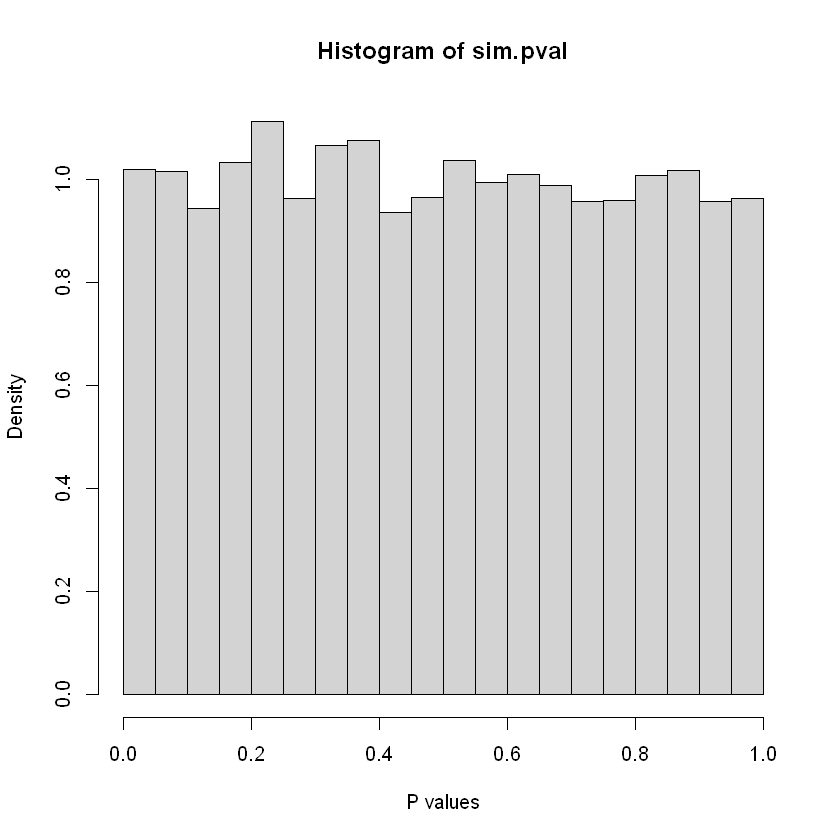

In [2]:
## Modify the simulation to report pvalues
alpha=0.03; # significance level 
simulate.one.instance<-function(n,alpha){
  X=rnorm(n)
  pval=t.test(X)$p.value
  return(pval)
}

N.sim=1e4;
set.seed(1)
n=50;
sim.pval=replicate(N.sim,simulate.one.instance(n,alpha));

hist(sim.pval,freq=F,xlab="P values")

# 4 Confidence interval

We will construct a $100(1-\alpha)\%$ Confidence interval given a confidence level $\alpha$

In [24]:
# For a given confidence level alpha, construct a 100(1-alpha)% confidence interval 

alpha=0.023;
# We can use lm() and confint() to construct confidence intervals
 X=rnorm(n)
fit.lm=lm(X~1);
confint(fit.lm,level=1-alpha)

,1.15 %,98.85 %
(Intercept),-0.30571,0.3607841


In [26]:

## Verify the coverage of the confidence invervals 
simulate.one.instance<-function(n,alpha){
 X=rnorm(n)
    fit.lm=lm(X~1);
  CIs=confint(fit.lm,level=1-alpha)
  return(CIs)
}

N.sim=1e4;
set.seed(1)
n=50;
sim.CIs=replicate(N.sim,simulate.one.instance(n,alpha));


In [29]:
## Verify the coverage 
(coverage=sum(sim.CIs[1,1,]< 0 & sim.CIs[1,2,]>0)/N.sim)
1-alpha


[1] 0.9779

[1] 0.977

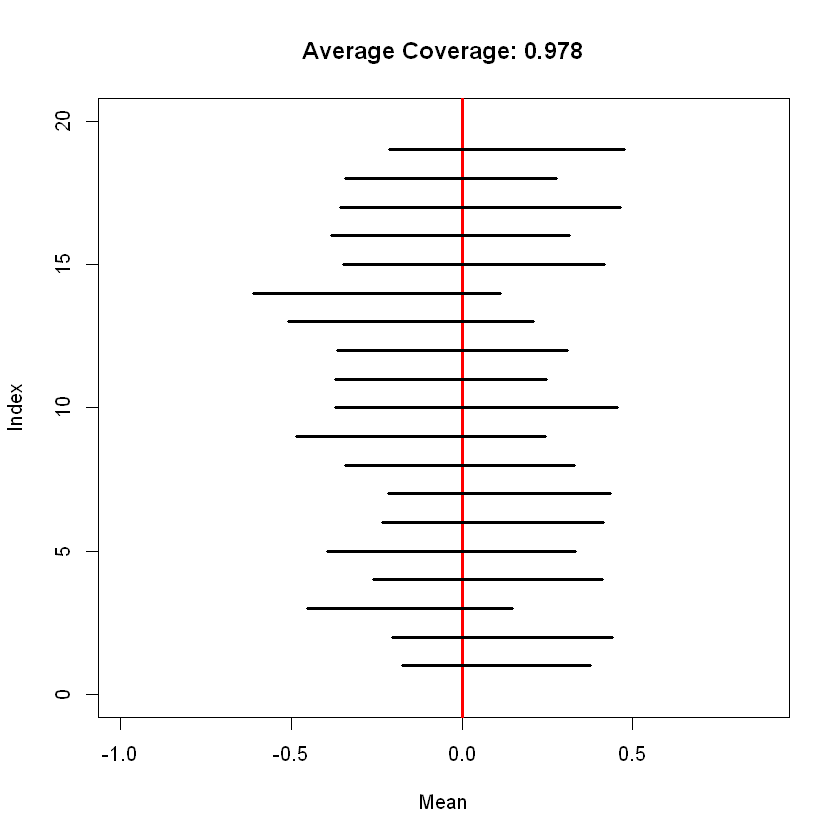

In [31]:
# Visualization 
plot(0,0,col="white",xlim=c(min(sim.CIs[1,1,]),max(sim.CIs[1,2,])),ylim=c(0,20),xlab="Mean",ylab="Index",main=paste('Average Coverage:', signif(coverage,3)))
abline(v=0,lwd=3,col='red')
for(i in 1:19){
  segments(sim.CIs[1,1,i],i,sim.CIs[1,2,i],i,lwd=3)
}